# TP Challenge

Replace your_name  by your name 

## Your task

Today you are a datascientist for a marketing saas company.
You have some data about your customer, a file with some features and the target **buy**.

The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

**The challenge is to correctly predict if a customer will click 'buy' on a website.**

## Importing Librairies

In [3]:
#import the librairies

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import*
from sklearn.dummy import DummyClassifier
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

df_train=pd.read_csv('./data/train.csv')

df_train.head()

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,6,23,1,2,1,5,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing

- Check if missing values

- Check if duplicates ( if yes delete duplicated rows)

In [4]:
# Supprimer la colonne Id pour check les duplications
df_train = df_train.drop('Id', axis=1).drop_duplicates()

# Suppression des elements null
df_train.isnull().sum().sort_values(ascending=False)

df_train

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,13,1,2,3,3,0,2,0,7,5,...,0,0,0,1,0,0,0,0,0,0
4103,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
4104,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
4105,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1


## Visualization 

- Check if you have outliers in each features (columns) using seaborn or matplotlib
- Check the correlation between each columns ( seaborn can maybe help you.. )[https://seaborn.pydata.org/generated/seaborn.pairplot.html]

- Plot the distribution of the target


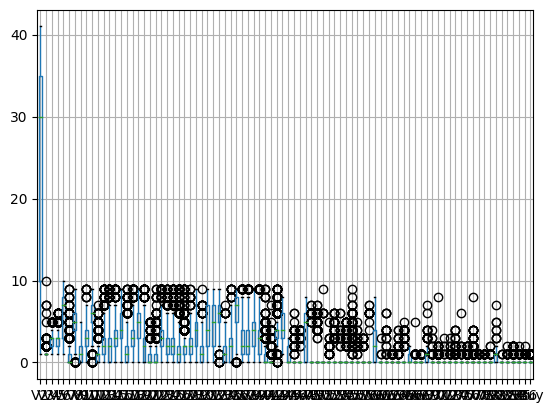

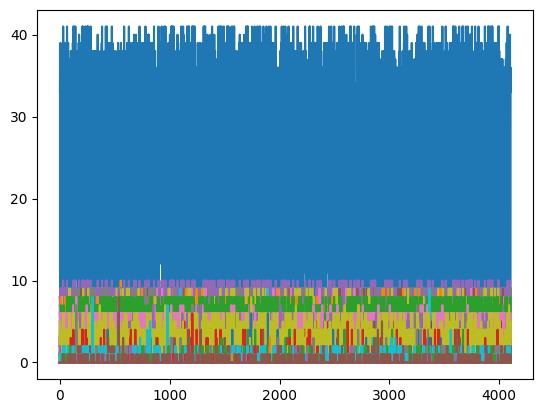

In [5]:
#your code here

# Vérification des outliers pour chaque colonne dans df_train
df_train.boxplot()
plt.show()

# Calculer la matrice de corrélation
correlation_matrix = df_train.corr()
correlation_matrix


# Tracer une paire de tracés pour visualiser les relations entre les variables
# sns.pairplot(df_train)
# plt.show()

plt.plot(df_train)
plt.show()








## Undersample your data

- Undersample the target with ( you may have to pip install -U imbalanced-learn)

from imblearn.over_sampling import RandomOverSampler, SMOTE

Ou 

from imblearn.under_sampling import RandomUnderSampler

In [6]:
# your code here
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(df_train.drop(columns=['Buy']), df_train['Buy'])



## Building models 

- Build a dummy model to have a baseline score

- Build a better model to classify your data and beat your baseline model

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve
--------------------------------









**⚠️(OPTIONAL)⚠️**
- Try to improve your first model by using a robust scaler or StandardScaler

- Try to use another  classifier model to improve your model performance

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve


0.5408163265306123 Accuracy
0.20408163265306123 Recall
0.625 Precision
0.3076923076923077 F1 Score


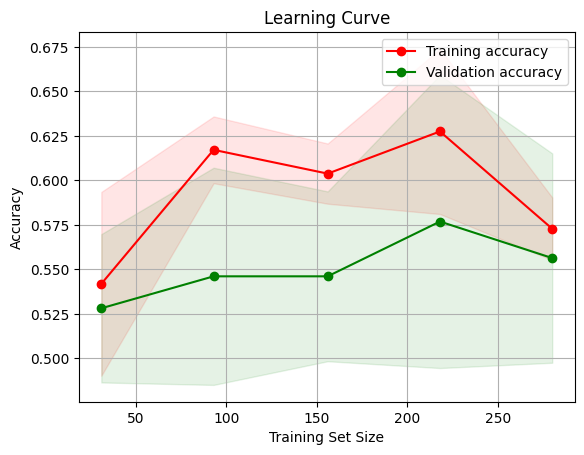

In [9]:
#your code

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

dummy_model = GaussianNB()
dummy_model.fit(X_train, y_train)

pred = dummy_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, pred)
baseline_recall = recall_score(y_test, pred)
baseline_precision = precision_score(y_test, pred)
baseline_f1_score = f1_score(y_test, pred)

print(baseline_accuracy, "Accuracy")
print(baseline_recall, "Recall")
print(baseline_precision, "Precision")
print(baseline_f1_score, "F1 Score")

def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training accuracy')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation accuracy')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

plot_learning_curve(dummy_model, X_train, y_train, cv=5, train_sizes=train_sizes)




Train Accuracy: 0.5769230769230769
Test Accuracy: 0.5306122448979592
Accuracy: 0.5306122448979592
Recall: 0.16326530612244897
Precision: 0.6153846153846154
F1 Score: 0.25806451612903225


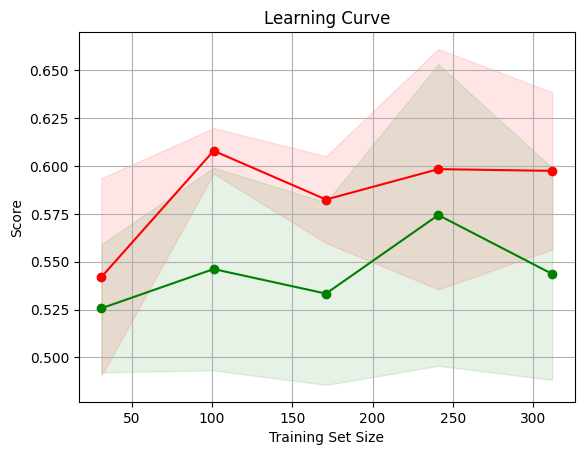

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = GaussianNB()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.show()

# Finish ?

add your code to a repos and send me the link by mail in the format :

the subject of the email will be **YOUR NAME | ML-IIM-challenge**

Send it to magloire.ndabagera@gmail.com at 5pm max.